In [1]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
campdir = getenv('CAMP');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));

In [2]:
% fnm = [workdir '/MOM6_exp/subme_model_hybrid/prog__004_182_00.nc']; %ocean_geometry.nc  prog
% expdir = [scradir '/subme_model_hybrid/'];
expdir = [workdir '/MOM6_exp/subme_model_hybrid/'];
fnm = [expdir '/sol_prog/prog__010_001_00.nc']; %ocean_geometry.nc  prog

ds = ncstruct(fnm);
% ncdisp(fnm);
grid_dir = [expdir ''];  
[grid, ~, ~] = read_grid_MOM([grid_dir '']); 
ds_IC = ncstruct([grid_dir '/Initial_state.nc']);
% timeVec = datevec( ds_IC.Time + datenum(1,1,1,0,0,0) )
% dn = daynoleap2datenum(day, pivotyr)
timeVec = datevec( daynoleap2datenum(ds_IC.Time, 1) )
timeVec = datevec( daynoleap2datenum(ds.Time, 1) )

% ds2 = ncstruct([expdir '/INPUT/MOM.res.nc']);
% timeVec = datevec( ds.Time + datenum(1,1,1,0,0,0) )
ds_IC.Interface;



timeVec =

     1     1     1     0     0     0


timeVec =

    10     1     1     0     0     0



## plot bathymetry and vertical coordinate

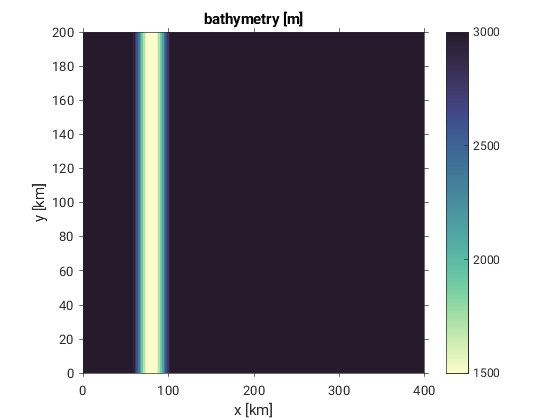

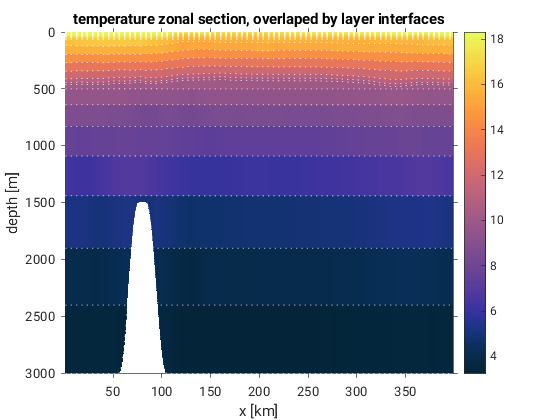

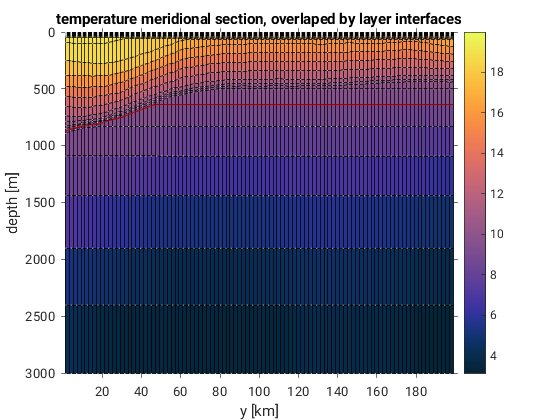

In [27]:


figure
f_do = grid.D;
imagescn(grid.lonh, grid.lath, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('deep'); colorbar;
title('bathymetry [m]')
xlabel('x [km]')
ylabel('y [km]')
% set(gcf,'PaperPositionMode','auto'); 
% exportgraphics(gcf,['bathy.png'], 'BackgroundColor','white','ContentType','image','resolution',400)

% ---- layer interfaces
% interface height below the mean sea level

% ----- zonal cross sec
it = 1;
jj = round(grid.njh/2);
e_abs = abs(ds.e);
depth_interfaces = squeeze(e_abs(:,jj,:,it));

clim = [-1 1]*1e-3;
figure
f_do = squeeze(ds.temp(1:end,jj,:,1));
hpc = pcolor(grid.geolon(:,jj)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');

set(gca,'tickdir','out');
cmocean('thermal')
colorbar
% caxis(clim)
title([' layer interfaces height at Y' num2str(ds.yh(jj)) ' at t' num2str(it)])

for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(:,jj,ik_plt,it));
    f1d;
    plot(grid.lonh,f1d,'w:')
    set(gca, 'YDir','reverse')
end

set(gca,'ylim',[0 3000])
xlabel('x [km]')
ylabel('depth [m]')
title('temperature zonal section, overlaped by layer interfaces')
% set(gcf,'PaperPositionMode','auto'); 
% exportgraphics(gcf,['temp_lay.png'], 'BackgroundColor','white','ContentType','image','resolution',400)

% ----- meridional cross sec
it = 1;
ii = 170;
depth_interfaces = squeeze(e_abs(ii,:,:,it)); % jj-nk
nk = size(depth_interfaces,2) - 1;

clim = [-1 1]*1e-3;
figure
f_do = squeeze(ds.temp(ii,:,:,1));
y2d = repmat(grid.geolat(ii,:), [nk 1])';
% contourf(y2d, depth_interfaces(:,2:end), f_do, 32, 'LineColor', 'none');
hpc = pcolor(y2d', depth_interfaces(:,2:end)', f_do'); %set(hpc, 'EdgeColor', 'none');

set(gca,'tickdir','out');
cmocean('thermal')
colorbar
for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(ii,:,ik_plt,it));
    % f1d(22)
    if ik_plt == 25
        plot(grid.lath,f1d,'r-')
    else
        plot(grid.lath,f1d,'w:')
    end
end
set(gca, 'YDir','reverse')
set(gca,'ylim',[0 3000])
xlabel('y [km]')
ylabel('depth [m]')
title('temperature meridional section, overlaped by layer interfaces')



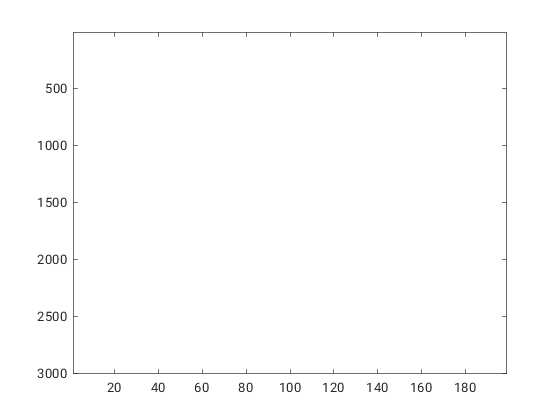

In [45]:
f_do = squeeze(ds.temp(ii,:,:,1));
z_interfaces = squeeze(e_abs(ii,:,:,1));

figure
contourf(grid.geolat(ii,:)', z_interfaces(:,2:end)', f_do',32); 
set(gca,'yDir','reverse')

## plot initial conditions


ans =

    18


ans =

    3.1267



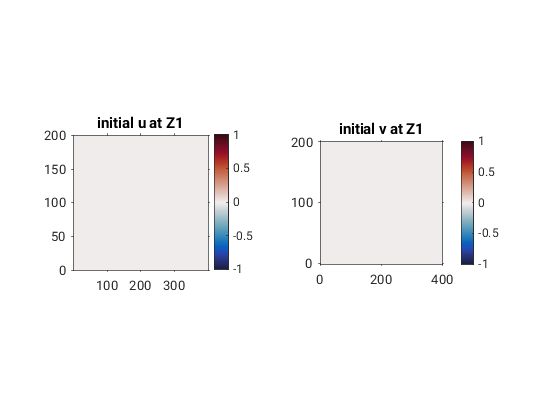

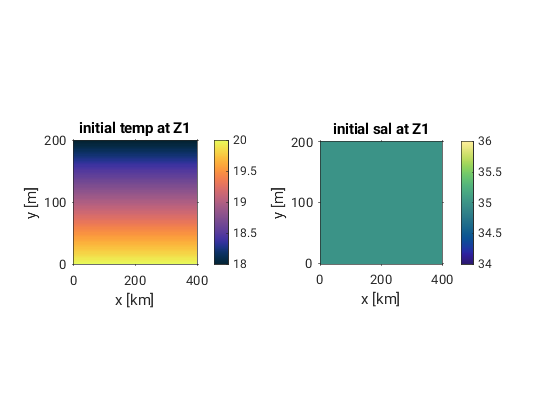

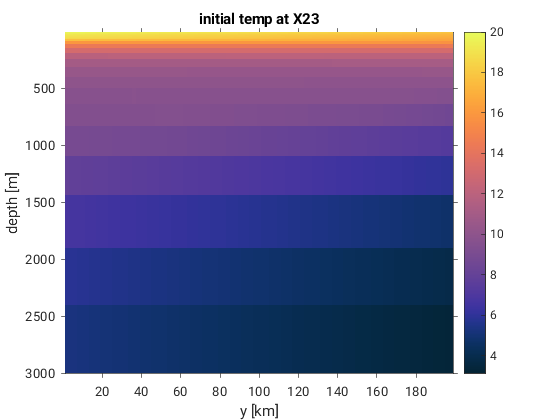

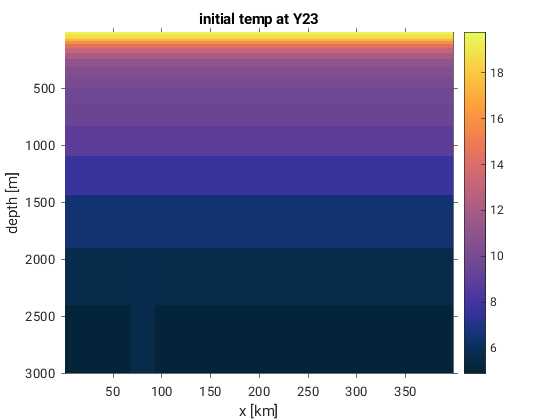

In [13]:
ik = 1;

figure
subplot(121)
f_do = squeeze(ds_IC.u(:,:,ik));
imagescn(grid.lonh, grid.lath, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
title(['initial u at Z' num2str(ik)])
subplot(122)
f_do = squeeze(ds_IC.v(:,:,ik));
imagescn(grid.lonh, grid.latq, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
title(['initial v at Z' num2str(ik)])

figure
subplot(121)
f_do = squeeze(ds_IC.Temp(:,:,ik));
% format long
min(f_do(:))
imagescn(grid.lonq, grid.lath, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
title(['initial temp at Z' num2str(ik)])
xlabel('x [km]'); ylabel('y [m]')

subplot(122)
f_do = squeeze(ds_IC.Salt(:,:,ik));
imagescn(grid.lonh, grid.latq, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('haline'); colorbar;
xlabel('x [km]'); ylabel('y [m]')
title(['initial sal at Z' num2str(ik)])

% ----- meridional cross sec
ii = 12;
figure
% subplot(121)
f_do = squeeze(ds_IC.Temp(ii,:,:));
min(f_do(:))
hpc = pcolor(grid.lath, grid.Interface(2:end), f_do'); 
set(hpc, 'EdgeColor', 'none');
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
title(['initial temp at X' num2str(grid.lonh(ii))])
xlabel('y [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')
 
% ----- zonal cross sec
jj = 12;
e_abs = abs(ds.e);
depth_interfaces = squeeze(e_abs(:,jj,:,it));

clim = [-1 1]*1e-3;
figure
f_do = squeeze(ds_IC.Temp(:,jj,:));
hpc = pcolor(grid.geolon(:,jj)', grid.Interface(2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
title(['initial temp at Y' num2str(grid.lonh(jj))])
xlabel('x [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')
 
% subplot(122)
% f_do = squeeze(ds_IC.Salt(:,jj,:));
% hpc = pcolor(grid.lonh, grid.Interface(2:end), f_do'); 
% set(hpc, 'EdgeColor', 'none');
% set(gca,'tickdir','out');
% cmocean('haline'); colorbar;
% title(['initial sal at Y' num2str(grid.lath(ii))])
% set(gca, 'YDir','reverse')

## plot solution at one time


ans =

  999.3746


timeVec =

     9    12    30     0     0     0


ans =

  996.5007


ans =

  996.0055



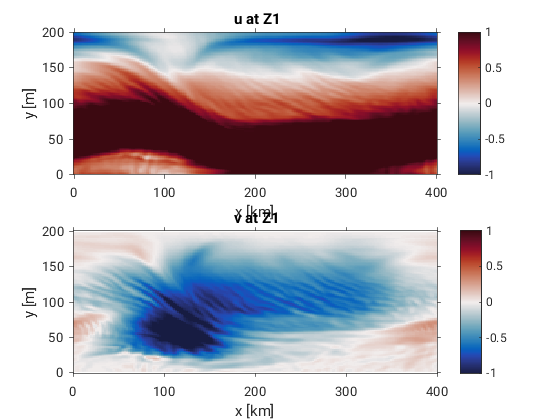

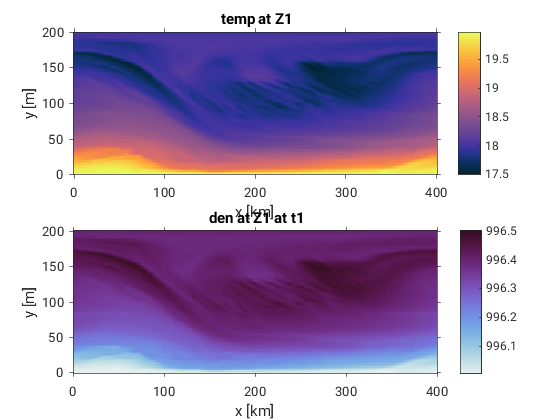

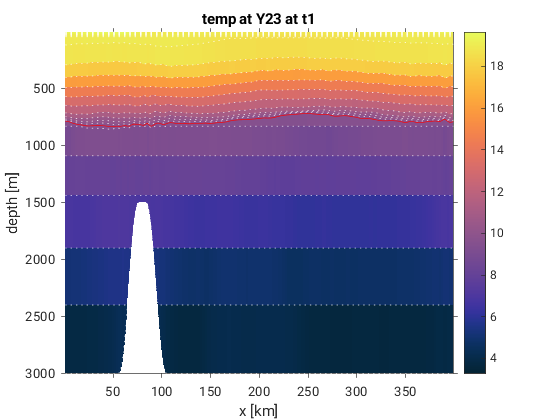

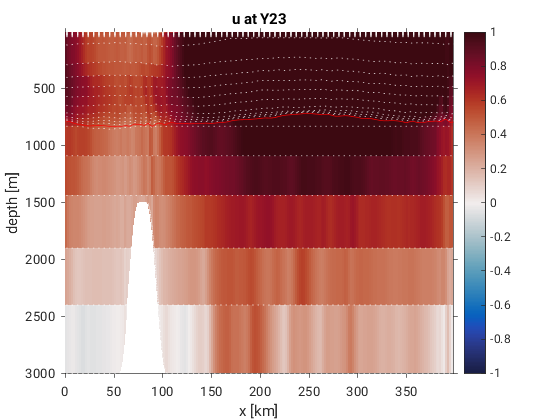

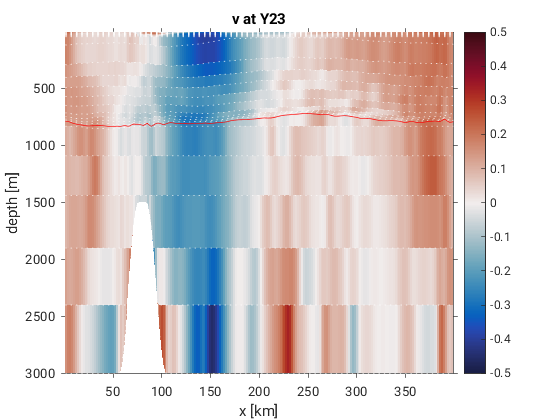

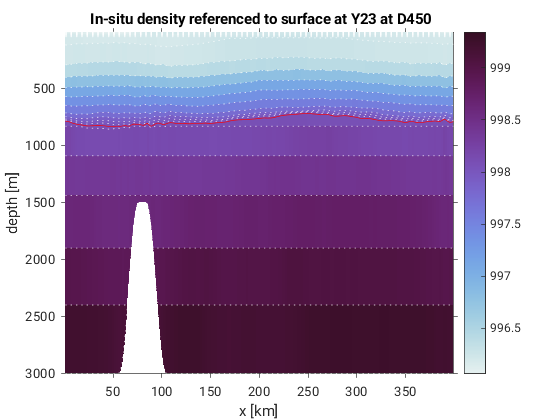

In [45]:
% reconstruct density from the linear EOS
RHO_T0_S0 = 1000;
DRHO_DT = -0.2;
density_recons = RHO_T0_S0 + DRHO_DT .* ds.temp;
max(ds.rhoinsitu(:))

ik = 1;
it = 1;

timeVec = datevec( ds.Time + datenum(1,1,1,0,0,0) )

figure
subplot(211)
f_do = squeeze(ds.u(:,:,ik,it));
imagescn(ds.xq, ds.yh, f_do'); 
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
title([' u at Z' num2str(ik)])
caxis([-1 1]*1)
xlabel('x [km]'); ylabel('y [m]')
subplot(212)
f_do = squeeze(ds.v(:,:,ik,it));
imagescn(ds.xh, ds.yq, f_do'); 
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
title([' v at Z' num2str(ik)])
caxis([-1 1]*1e0)
xlabel('x [km]'); ylabel('y [m]')
% set(gcf,'PaperPositionMode','auto'); 
% exportgraphics(gcf,['vel_xy.png'], 'BackgroundColor','white','ContentType','image','resolution',400)

figure
subplot(211)
f_do = squeeze(ds.temp(:,:,ik,it));
imagescn(ds.xq, ds.yh, f_do'); 
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
title([' temp at Z' num2str(ik)])
xlabel('x [km]'); ylabel('y [m]')
subplot(212)
f_do = squeeze(ds.rhoinsitu(:,:,ik,it));
max(f_do(:))
min(f_do(:))
imagescn(ds.xh, ds.yq, f_do'); 
set(gca,'tickdir','out');
cmocean('density'); colorbar;
title([' den at Z' num2str(ik) ' at t' num2str(it)])
xlabel('x [km]'); ylabel('y [m]')
% set(gcf,'PaperPositionMode','auto'); 
% exportgraphics(gcf,['temp_xy.png'], 'BackgroundColor','white','ContentType','image','resolution',400)


% ----- zonal cross sec
jj = 12;
depth_interfaces = squeeze(e_abs(:,jj,:,it));

clim = [-1 1]*1e-3;

figure
f_do = squeeze(ds.temp(:,jj,:,it));
hpc = pcolor(grid.geolon(:,jj)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
% axis square;
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
% title(['temp at Y' num2str(grid.lath(jj)) ' at t' num2str(it)])
title(['temp at Y' num2str(grid.lath(jj)) ' at t' num2str(it)])

xlabel('x [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')
for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(:,jj,ik_plt,it));
    % f1d(22)
    if ik_plt == 25
        plot(grid.lonh,f1d,'r-')
    else
        plot(grid.lonh,f1d,'w:')
    end
end

% --- u
figure
f_do = squeeze(ds.u(1:end-1,jj,:,it));
hpc = pcolor(grid.geolonb(1:end-1,jj)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
caxis([-1 1])
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
% title(['temp at Y' num2str(grid.lath(jj)) ' at t' num2str(it)])
title(['u at Y' num2str(grid.lath(jj)) ])

xlabel('x [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')
for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(:,jj,ik_plt,it));
    % f1d(22)
    if ik_plt == 25
        plot(grid.lonh,f1d,'r-')
    else
        plot(grid.lonh,f1d,'w:')
    end
end

% --- v
figure
f_do = squeeze(ds.v(:,jj,:,it));
hpc = pcolor(grid.geolon(:,jj)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
caxis([-1 1]*0.5)
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
% title(['temp at Y' num2str(grid.lath(jj)) ' at t' num2str(it)])
title(['v at Y' num2str(grid.lath(jj)) ])

xlabel('x [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')
for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(:,jj,ik_plt,it));
    % f1d(22)
    if ik_plt == 25
        plot(grid.lonh,f1d,'r-')
    else
        plot(grid.lonh,f1d,'w:')
    end
end

% --- density

figure
f_do = squeeze(ds.rhoinsitu(:,jj,:,it));
hpc = pcolor(grid.geolon(:,jj)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
% 
set(gca,'tickdir','out');
cmp = cmocean('dense');
% cmp = flipud(cmp);
colormap(cmp);
colorbar;
% title([' In-situ density referenced to surface at Y' num2str(grid.lath(jj)) ' at t' num2str(it)])
title([' In-situ density referenced to surface at Y' num2str(grid.lath(jj)) ' at D' num2str(450)])
xlabel('x [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')

e_abs = abs(ds.e);
for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(:,jj,ik_plt,it));
    % f1d(22)
    if ik_plt == 25
        plot(grid.lonh,f1d,'r-')
    else
        plot(grid.lonh,f1d,'w:')
    end
end

## meridional sections


ans =

  999.3746

  Name                    Size             Bytes  Class     Attributes

  a                       1x101              808  double              
  depth_interfaces      100x31             24800  double              
  f_do                  100x30             24000  double              



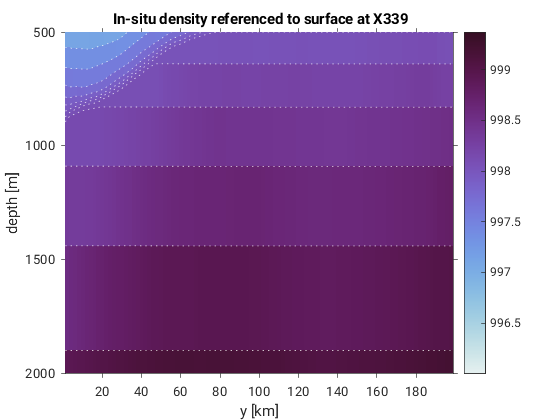

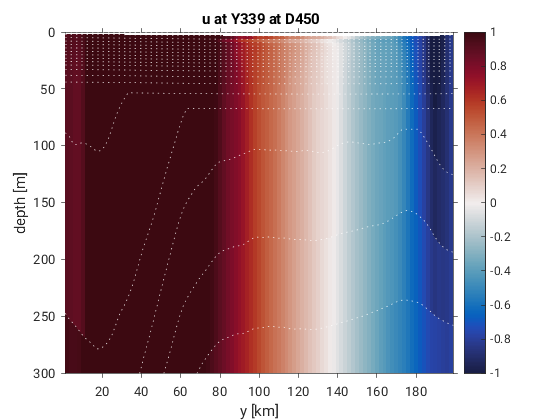

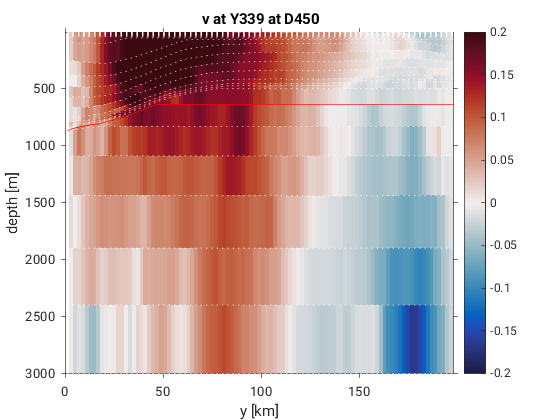

In [42]:
ii = 170;
depth_interfaces = squeeze(e_abs(ii,:,:,it));

max(ds.rhoinsitu(:))
% ------ density
figure
f_do = squeeze(ds.rhoinsitu(ii,:,:,it));
y2d = repmat(grid.geolat(ii,:), [nk 1])';
% contourf(y2d, depth_interfaces(:,2:end), f_do, 31, 'linecolor','none');
hpc = pcolor(grid.geolat(ii,:)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
set(gca,'tickdir','out');
cmp = cmocean('dense');
% cmp = flipud(cmp);
colormap(cmp);
colorbar;
title([' In-situ density referenced to surface at X' num2str(grid.lonh(ii))])
xlabel('y [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')

% e_abs = cat(3, zeros(grid.nih,grid.njh), cumsum(ds.h,3));
for ik_plt = 1:1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(ii,:,ik_plt,it));
    % f1d(22)
    plot(grid.lath,f1d,'w:')
    set(gca, 'YDir','reverse')
end
set(gca, 'YLim',[500 2000])

% ---- u
figure
f_do = squeeze(ds.u(ii,:,:,it));
hpc = pcolor(grid.geolat(ii,:)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
set(gca,'tickdir','out');
cmp = cmocean('balance');
caxis([-1 1])
colormap(cmp);
colorbar;
title([' u at Y' num2str(grid.lonh(ii)) ' at D' num2str(450)])
xlabel('y [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')

% e_abs = cat(3, zeros(grid.nih,grid.njh), cumsum(ds.h,3));
for ik_plt = 1:1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(ii,:,ik_plt,it));
    % f1d(22)
    plot(grid.lath,f1d,'w:')
    set(gca, 'YDir','reverse')
end
set(gca, 'YLim',[0 300])

% ---- v
figure
f_do = squeeze(ds.v(ii,1:end-1,:,it));
a = grid.geolatb(ii,:); whos a f_do depth_interfaces
hpc = pcolor(grid.geolatb(ii,1:end-1)', depth_interfaces(:,2:end)', f_do'); set(hpc, 'EdgeColor', 'none');
set(gca,'tickdir','out');
cmp = cmocean('balance');
caxis([-1 1]*.2)
colormap(cmp);
colorbar;
title([' v at Y' num2str(grid.lonh(ii)) ' at D' num2str(450)])
xlabel('y [km]')
ylabel('depth [m]')
set(gca, 'YDir','reverse')

% e_abs = cat(3, zeros(grid.nih,grid.njh), cumsum(ds.h,3));
for ik_plt = 1:length(grid.Interface)
    hold on
    f1d = squeeze(e_abs(ii,:,ik_plt,it));
    % f1d(22)
    if ik_plt == 25
        plot(grid.lath,f1d,'r-')
    else
        plot(grid.lath,f1d,'w:')
    end
end
% set(gca, 'YLim',[0 300])


ds = 

  struct with fields:

           xq: [201x1 double]
           yh: [100x1 double]
           zl: [30x1 double]
         Time: 3285
           xh: [200x1 double]
           yq: [101x1 double]
           zi: [31x1 double]
            u: [201x100x30 double]
            v: [200x101x30 double]
            h: [200x100x30 double]
            e: [200x100x31 double]
           PV: [201x101x30 double]
         temp: [200x100x30 double]
    rhoinsitu: [200x100x30 double]



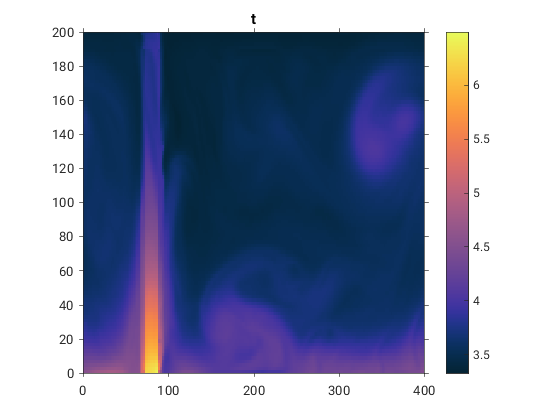

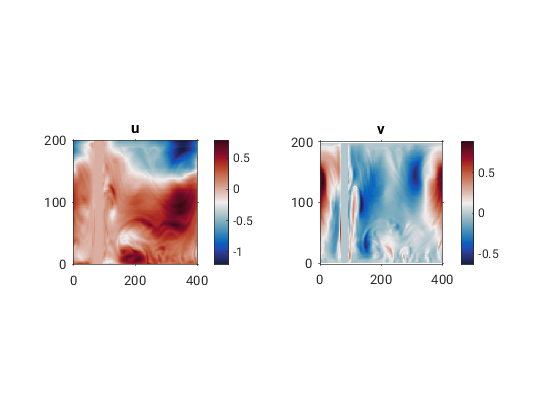

In [32]:
ik = 29;
it = 1;
clim = [-1 1]*1e-3;

ds
figure
f_do = squeeze(ds.temp(:,:,ik,it));
imagescn(ds.xh, ds.yh, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
% caxis(clim)
title('t')

figure
subplot(121)
f_do = squeeze(ds.u(:,:,ik,it));
f_do(1,:) - f_do(end,:); % check if re-entrant in x is applied
imagescn(ds.xq, ds.yh, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
% caxis(clim)
title('u')
subplot(122)
f_do = squeeze(ds.v(:,:,ik,it));
imagescn(ds.xh, ds.yq, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('balance'); colorbar;
% caxis(clim)
title('v')

% hold on
% dx_plt = 2; dy_plt = 2;
% [ii,jj] = deal(1:dx_plt:grid.nih, 1:dy_plt:grid.njh);
% quiver(grid.geolon(ii,jj),grid.geolat(ii,jj),ds.u(ii,jj,ik,it),ds.v(ii,jj,ik,it),'LineWidth',.7,'Color','w');



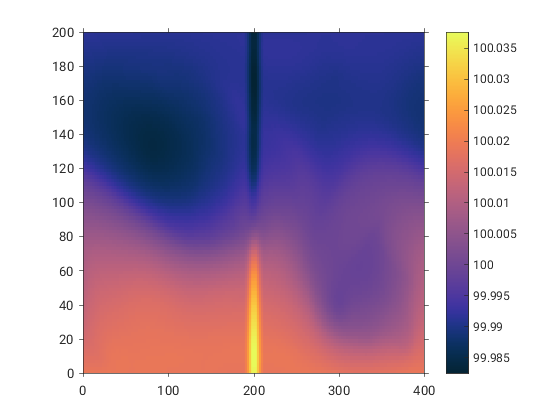

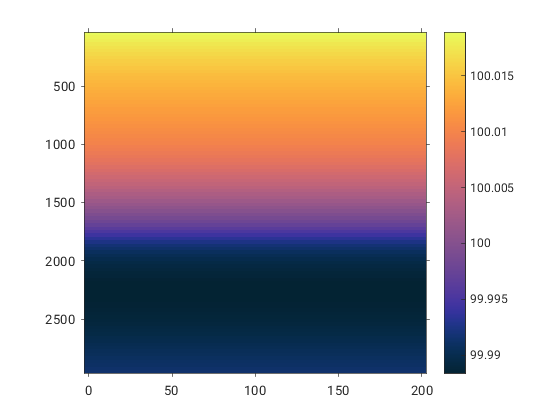

In [7]:
ik = 1;
it = 1;

figure
f_do = squeeze(ds.h(:,:,ik,it));
imagescn(ds.xh, ds.yh, f_do'); 
axis square;
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;

figure
f_do = squeeze(ds.h(2,:,:,1));
imagescn(ds.yh, ds.zl, f_do); 
axis square;
set(gca,'tickdir','out');
cmocean('thermal'); colorbar;
% caxis(clim)
 set(gca, 'YDir','reverse')

In [18]:
max(ds.h(:))


ans =

    9.9997



In [19]:
min(ds.h(:))


ans =

    9.9972



In [33]:
ds.zi


ans =

           0
         100
         200
         300
         400
         500
         600
         700
         800
         900
        1000
        1100
        1200
        1300
        1400
        1500
        1600
        1700
        1800
        1900
        2000
        2100
        2200
        2300
        2400
        2500
        2600
        2700
        2800
        2900
        3000

